# Kütüphanelerin import edilmesi

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objs as go 
import chart_studio.plotly as py
from prophet import Prophet
import numpy as np
from prophet.plot import add_changepoints_to_plot

D:\Anaconda\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=pd.read_csv(r"satistahmin.csv")

# İlk bakış

In [4]:
df=df.rename(columns={"siparisyilaygun":"tarih","urunklasmanref":"klasman_ref","toplamsatistutar":"toplam_tutar","toplamadet":"toplam_adet"})

In [5]:
df["tarih"] =  pd.to_datetime(df["tarih"], format='%Y%m%d')

In [7]:
df.describe()

,urunoptionref,klasman_ref,toplam_adet,toplam_tutar
count,1.081919e+07,1.081919e+07,1.081919e+07,1.081919e+07
mean,1.452344e+06,3.453787e+03,3.553069e+00,1.092708e+02
std,1.386253e+05,2.945357e+03,6.617608e+00,1.975520e+02
min,2.702230e+05,1.023000e+03,0.000000e+00,0.000000e+00
25%,1.376524e+06,1.535000e+03,1.000000e+00,2.999000e+01
50%,1.458428e+06,2.170000e+03,2.000000e+00,5.995000e+01
75%,1.552996e+06,3.081000e+03,4.000000e+00,1.199700e+02
max,1.899417e+06,9.147000e+03,2.175000e+03,3.320129e+04


In [8]:
df.isnull().sum()

tarih               0
urunoptionref       0
urunoptiontanim     0
klasman_ref         0
urunklasmantanim    0
toplam_adet         0
toplam_tutar        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10819193 entries, 0 to 10819192
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   tarih             datetime64[ns]
 1   urunoptionref     int64         
 2   urunoptiontanim   object        
 3   klasman_ref       int64         
 4   urunklasmantanim  object        
 5   toplam_adet       int64         
 6   toplam_tutar      float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 577.8+ MB


# TARİH KIRILIMINDA TOPLAM TUTAR/TOPLAM ADET

## Verinin işlenmesi ve bazı spesifik görselleştirmeler

In [10]:
def mevsim(tarih):
    if tarih in np.arange("2017-01-01","2017-03-21", dtype='datetime64[D]'):
        return "kış"
    elif tarih in np.arange("2017-03-21","2017-06-22", dtype='datetime64[D]'):
        return "ilkbahar"
    elif tarih in np.arange("2017-06-22","2017-09-23", dtype='datetime64[D]'):
        return "yaz"
    elif tarih in np.arange("2017-09-23","2017-12-22", dtype='datetime64[D]'):
        return "sonbahar"
    elif tarih in np.arange("2017-12-22","2018-01-01", dtype='datetime64[D]'):
        return "kış"
    
    elif tarih in np.arange("2018-01-01","2018-03-21", dtype='datetime64[D]'):
        return "kış"
    elif tarih in np.arange("2018-03-21","2018-06-22", dtype='datetime64[D]'):
        return "ilkbahar"
    elif tarih in np.arange("2018-06-22","2018-09-23", dtype='datetime64[D]'):
        return "yaz"
    elif tarih in np.arange("2018-09-23","2018-12-22", dtype='datetime64[D]'):
        return "sonbahar"
    elif tarih in np.arange("2018-12-22","2019-01-01", dtype='datetime64[D]'):
        return "kış"
    
    elif tarih in np.arange("2019-01-01","2019-03-21", dtype='datetime64[D]'):
        return "kış"
    elif tarih in np.arange("2019-03-21","2019-06-22", dtype='datetime64[D]'):
        return "ilkbahar"
    elif tarih in np.arange("2019-06-22","2019-09-23", dtype='datetime64[D]'):
        return "yaz"
    elif tarih in np.arange("2019-09-23","2019-12-22", dtype='datetime64[D]'):
        return "sonbahar"
    elif tarih in np.arange("2019-12-22","2020-01-01", dtype='datetime64[D]'):
        return "kış"


In [ ]:
df2= df.groupby(['tarih']).agg({"toplam_tutar":"sum","toplam_adet":"sum"}).reset_index()

#mevsimlerin dataframe'e eklenmesi
df2['mevsim']=df2['tarih'].apply(mevsim)

df3= df2.groupby(['mevsim']).agg({"toplam_tutar":"sum","toplam_adet":"sum"}).reset_index()
df2["ortalama_getiri"]=df2["toplam_tutar"]/df2["toplam_adet"]

df2["yıl"]=df2.tarih.dt.year
df2["ay"]=df2.tarih.dt.month
df2["gün"]=df2.tarih.dt.day   

df_2017=df2[df2["yıl"]==2017]
df_2018=df2[df2["yıl"]==2018]
df_2019=df2[df2["yıl"]==2019]

### Mevsim bazlı toplam adet/satış tutarı analizleri

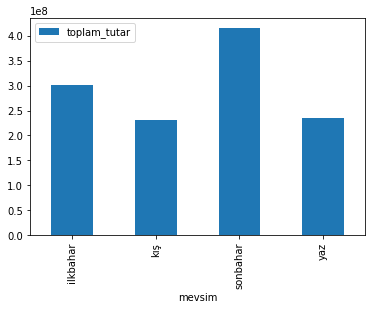

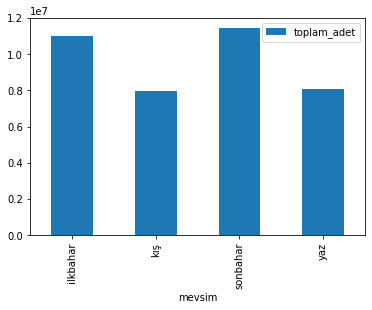

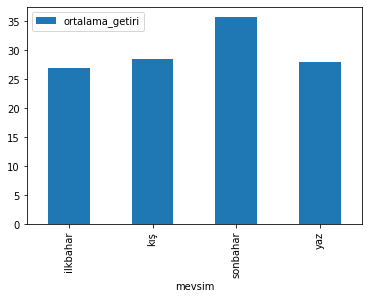

In [11]:
#miktarların, tutarların ve ortalama getirinin mevsimlere göre dağılımı
df3.plot.bar(x='mevsim', y='toplam_tutar')
df3.plot.bar(x='mevsim', y='toplam_adet')
df2.groupby("mevsim").agg({"ortalama_getiri":"mean"}).plot.bar();

plt.show()

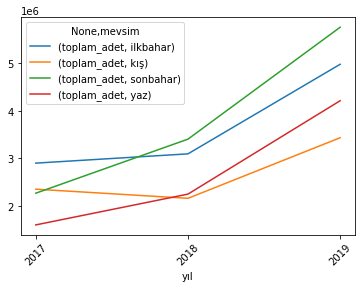

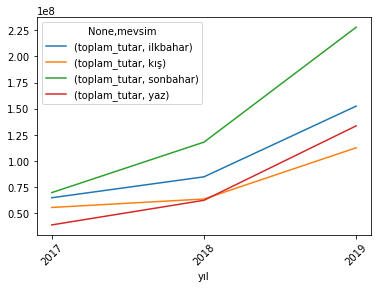

In [12]:
df2.groupby(["yıl","mevsim"]).agg({"toplam_adet":"sum"}).unstack().plot()
plt.xticks(rotation=45)
plt.xticks([2017,2018,2019])
df2.groupby(["yıl","mevsim"]).agg({"toplam_tutar":"sum"}).unstack().plot()
plt.xticks(rotation=45)
plt.xticks([2017,2018,2019])

plt.show()

### Yıllara göre toplam tutar/toplam adet değerlerinin mevsimsel anlamlandırılması

İlkbahar=Mavi , Yaz=Kırmızı , Sonbahar=Sarı, Kış=Yeşil


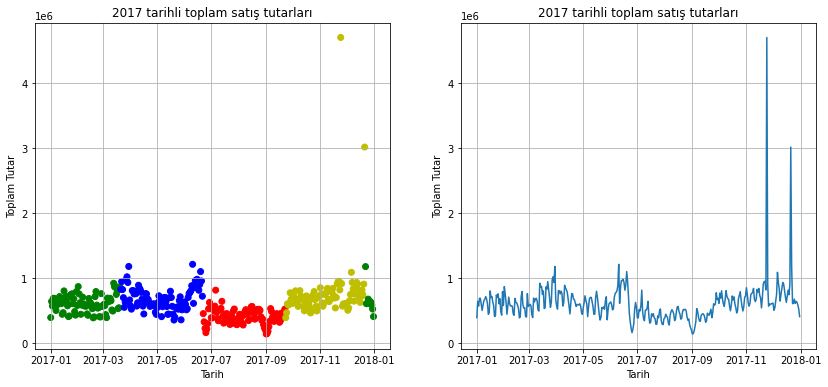

İlkbahar=Mavi , Yaz=Kırmızı , Sonbahar=Sarı, Kış=Yeşil


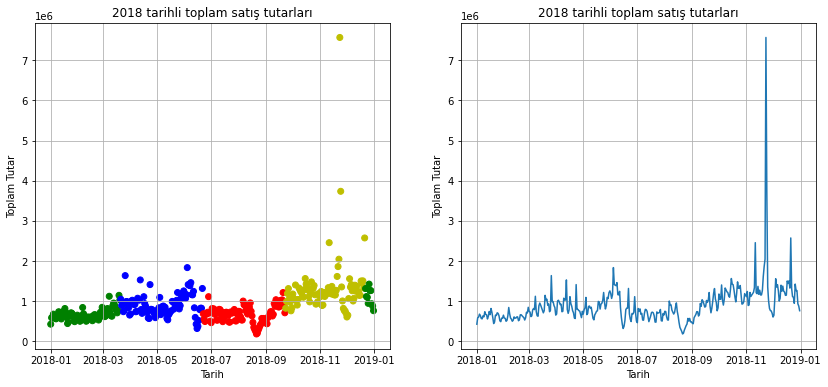

İlkbahar=Mavi , Yaz=Kırmızı , Sonbahar=Sarı, Kış=Yeşil


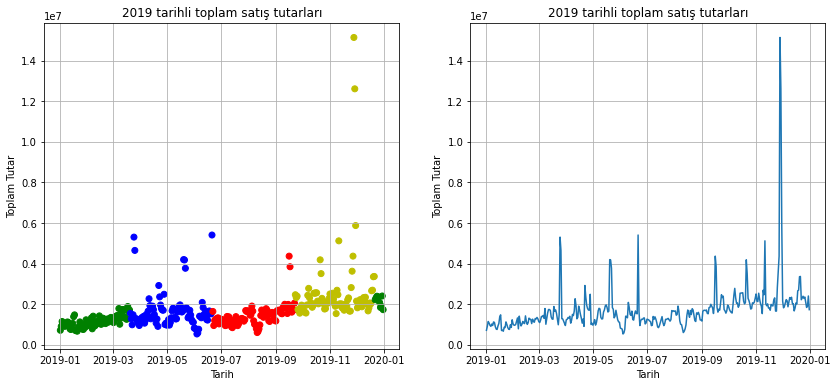

In [13]:
colors = {'ilkbahar':'b', 'yaz':'r', 'sonbahar':'y', 'kış':'g'}
print("İlkbahar=Mavi , Yaz=Kırmızı , Sonbahar=Sarı, Kış=Yeşil")
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.scatter(df_2017['tarih'], df_2017['toplam_tutar'],c=df_2017["mevsim"].map(colors))
plt.title('2017 tarihli toplam satış tutarları')
plt.xlabel('Tarih')
plt.ylabel('Toplam Tutar')
plt.grid()

plt.subplot(1,2,2)
plt.plot(df_2017['tarih'], df_2017['toplam_tutar'])
plt.title('2017 tarihli toplam satış tutarları')
plt.xlabel('Tarih')
plt.ylabel('Toplam Tutar')
plt.grid()
plt.show()

print("İlkbahar=Mavi , Yaz=Kırmızı , Sonbahar=Sarı, Kış=Yeşil")
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.scatter(df_2018['tarih'], df_2018['toplam_tutar'],c=df_2018["mevsim"].map(colors))
plt.title('2018 tarihli toplam satış tutarları')
plt.xlabel('Tarih')
plt.ylabel('Toplam Tutar')
plt.grid()
plt.subplot(1,2,2)
plt.plot(df_2018['tarih'], df_2018['toplam_tutar'])
plt.title('2018 tarihli toplam satış tutarları')
plt.xlabel('Tarih')
plt.ylabel('Toplam Tutar')
plt.grid()

plt.show()

print("İlkbahar=Mavi , Yaz=Kırmızı , Sonbahar=Sarı, Kış=Yeşil")
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.scatter(df_2019['tarih'], df_2019['toplam_tutar'],c=df_2019["mevsim"].map(colors))
plt.title('2019 tarihli toplam satış tutarları')
plt.xlabel('Tarih')
plt.ylabel('Toplam Tutar')
plt.grid()
plt.subplot(1,2,2)
plt.plot(df_2019['tarih'], df_2019['toplam_tutar'])
plt.title('2019 tarihli toplam satış tutarları')
plt.xlabel('Tarih')
plt.ylabel('Toplam Tutar')
plt.grid()
plt.show()

#### Daha gözlemlenebilir ölçekte

##### Yıllara göre toplam tutar mevsimsel anlamlandırma

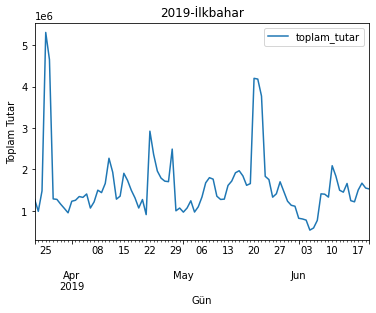

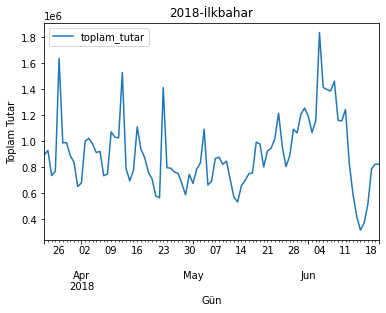

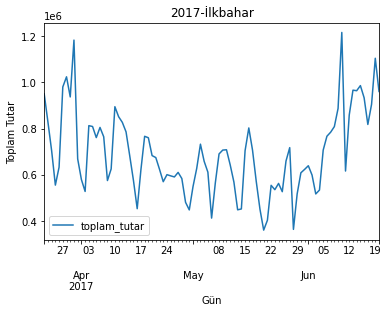

------------------------------------------------------------


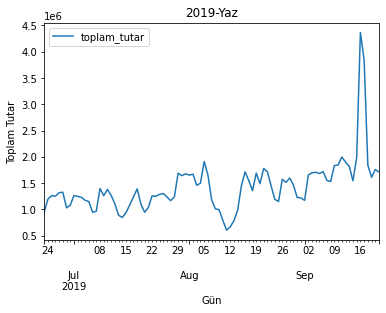

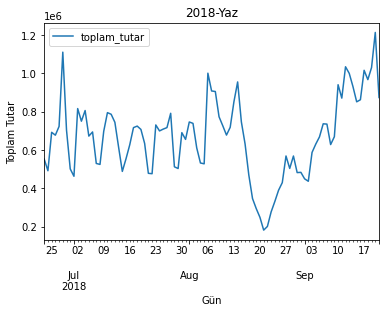

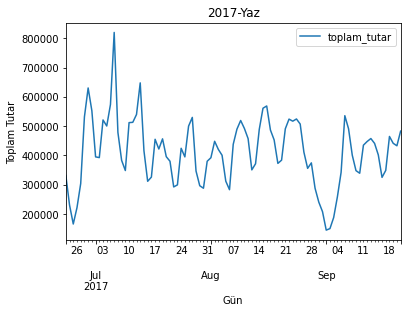

------------------------------------------------------------


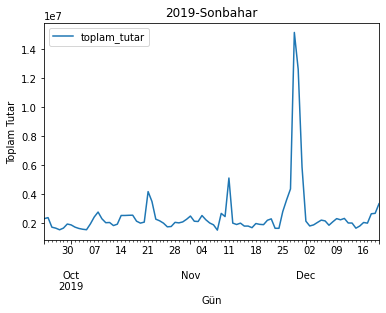

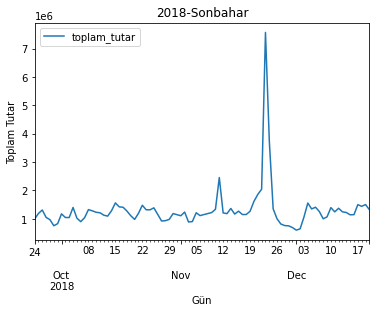

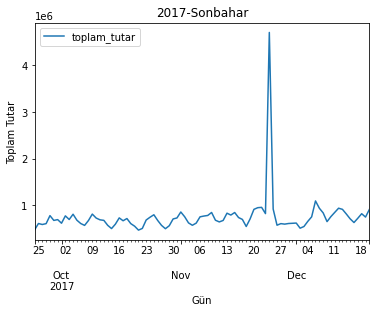

------------------------------------------------------------


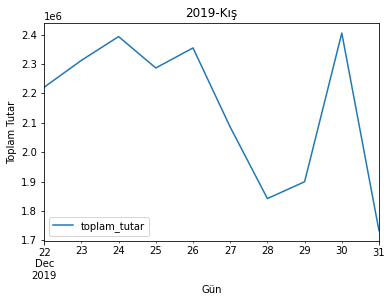

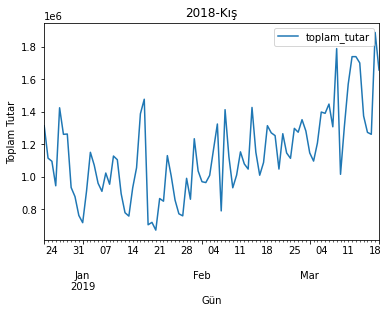

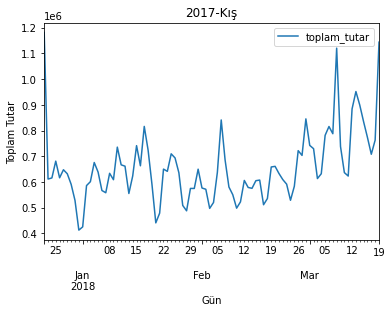

In [14]:
#yıllara göre toplam tutar
df2.query("tarih > '2019-03-21' and tarih < '2019-06-21'").plot(x='tarih', y='toplam_tutar')
plt.title("2019-İlkbahar")
plt.xlabel("Gün")
plt.ylabel("Toplam Tutar")
df2.query("tarih > '2018-03-21' and tarih < '2018-06-21'").plot(x='tarih', y='toplam_tutar')
plt.title("2018-İlkbahar")
plt.xlabel("Gün")
plt.ylabel("Toplam Tutar")
df2.query("tarih > '2017-03-21' and tarih < '2017-06-21'").plot(x='tarih', y='toplam_tutar')
plt.title("2017-İlkbahar")
plt.xlabel("Gün")
plt.ylabel("Toplam Tutar")

plt.show()
#ilkbahar mevsimi dağılımı
print("---"*20)

df2.query("tarih > '2019-06-22' and tarih < '2019-09-22'").plot(x='tarih', y='toplam_tutar')
plt.title("2019-Yaz")
plt.xlabel("Gün")
plt.ylabel("Toplam Tutar")
df2.query("tarih > '2018-06-22' and tarih < '2018-09-22'").plot(x='tarih', y='toplam_tutar')
plt.title("2018-Yaz")
plt.xlabel("Gün")
plt.ylabel("Toplam Tutar")
df2.query("tarih > '2017-06-22' and tarih < '2017-09-22'").plot(x='tarih', y='toplam_tutar')
plt.title("2017-Yaz")
plt.xlabel("Gün")
plt.ylabel("Toplam Tutar")
plt.show()
#yaz mevsimi dağılımı
print("---"*20)


df2.query("tarih > '2019-09-23' and tarih < '2019-12-21'").plot(x='tarih', y='toplam_tutar')
plt.title("2019-Sonbahar")
plt.xlabel("Gün")
plt.ylabel("Toplam Tutar")
df2.query("tarih > '2018-09-23' and tarih < '2018-12-21'").plot(x='tarih', y='toplam_tutar')
plt.title("2018-Sonbahar")
plt.xlabel("Gün")
plt.ylabel("Toplam Tutar")
df2.query("tarih > '2017-09-23' and tarih < '2017-12-21'").plot(x='tarih', y='toplam_tutar') 
plt.title("2017-Sonbahar")
plt.xlabel("Gün")
plt.ylabel("Toplam Tutar")
plt.show()
#sonbahar dağılımı
print("---"*20)

df2.query("tarih > '2019-12-21' and tarih < '2020-01-01'").plot(x='tarih', y='toplam_tutar')
plt.title("2019-Kış")
plt.xlabel("Gün")
plt.ylabel("Toplam Tutar")
df2.query("tarih > '2018-12-21' and tarih < '2019-03-20'").plot(x='tarih', y='toplam_tutar')
plt.title("2018-Kış")
plt.xlabel("Gün")
plt.ylabel("Toplam Tutar")
df2.query("tarih > '2017-12-21' and tarih < '2018-03-20'").plot(x='tarih', y='toplam_tutar')
plt.title("2017-Kış")
plt.xlabel("Gün")
plt.ylabel("Toplam Tutar")
plt.show()
#kış mevsimi dağılımı

##### Yıllara göre toplam adet mevsimsel anlamlandırma

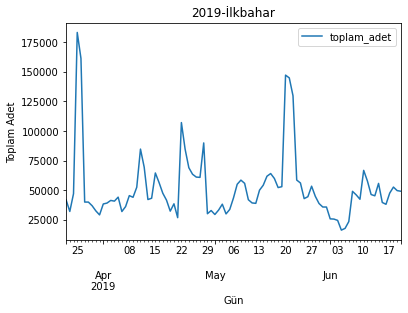

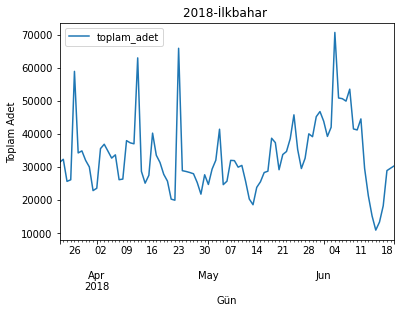

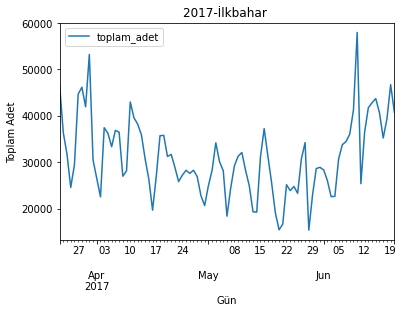

------------------------------------------------------------


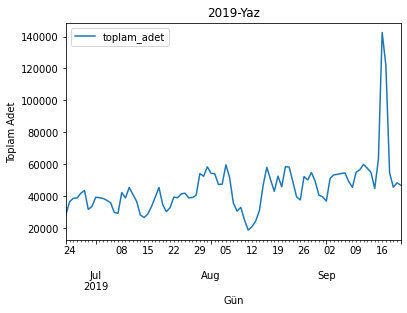

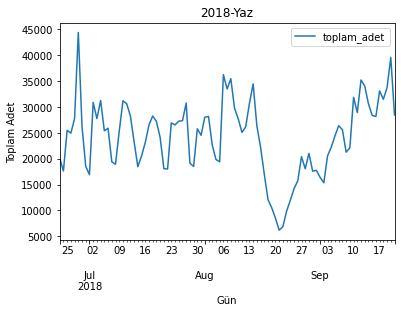

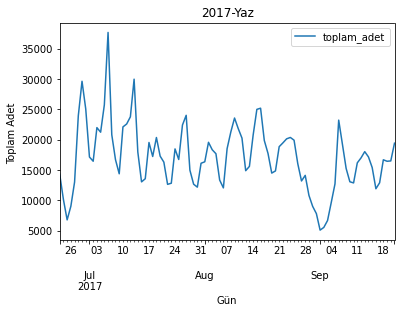

------------------------------------------------------------


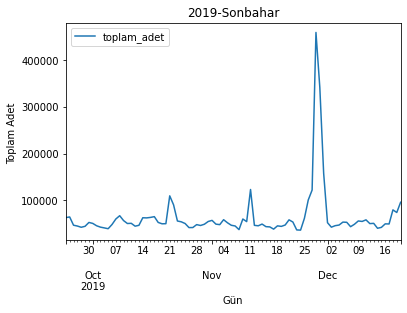

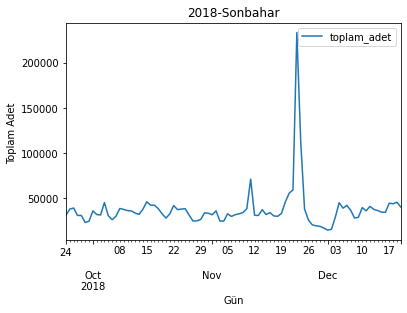

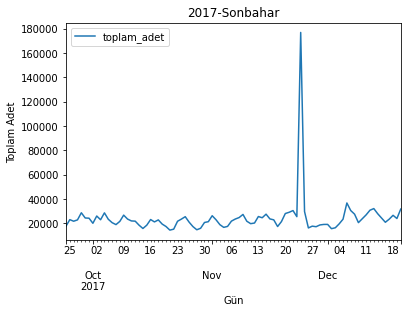

------------------------------------------------------------


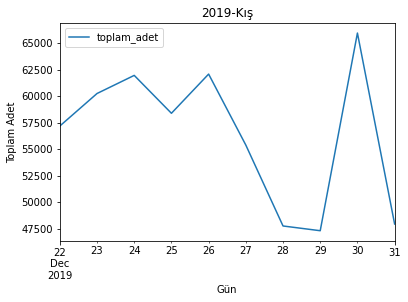

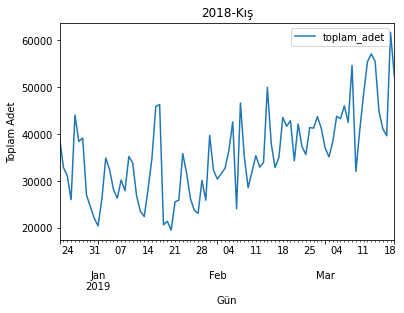

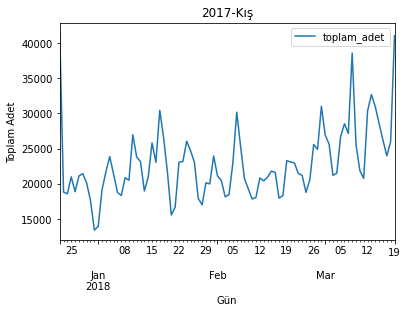

In [15]:
#yıllara göre toplam adet
df2.query("tarih > '2019-03-21' and tarih < '2019-06-21'").plot(x='tarih', y='toplam_adet')
plt.title("2019-İlkbahar")
plt.xlabel("Gün")
plt.ylabel("Toplam Adet")
df2.query("tarih > '2018-03-21' and tarih < '2018-06-21'").plot(x='tarih', y='toplam_adet')
plt.title("2018-İlkbahar ")
plt.xlabel("Gün")
plt.ylabel("Toplam Adet")
df2.query("tarih > '2017-03-21' and tarih < '2017-06-21'").plot(x='tarih', y='toplam_adet')
plt.title("2017-İlkbahar ")
plt.xlabel("Gün")
plt.ylabel("Toplam Adet")

plt.show()
#ilkbahar mevsimi dağılımı
print("---"*20)

df2.query("tarih > '2019-06-22' and tarih < '2019-09-22'").plot(x='tarih', y='toplam_adet')
plt.title("2019-Yaz")
plt.xlabel("Gün")
plt.ylabel("Toplam Adet")
df2.query("tarih > '2018-06-22' and tarih < '2018-09-22'").plot(x='tarih', y='toplam_adet')
plt.title("2018-Yaz")
plt.xlabel("Gün")
plt.ylabel("Toplam Adet")
df2.query("tarih > '2017-06-22' and tarih < '2017-09-22'").plot(x='tarih', y='toplam_adet')
plt.title("2017-Yaz")
plt.xlabel("Gün")
plt.ylabel("Toplam Adet ")
plt.show()
#yaz mevsimi dağılımı
print("---"*20)


df2.query("tarih > '2019-09-23' and tarih < '2019-12-21'").plot(x='tarih', y='toplam_adet')
plt.title("2019-Sonbahar")
plt.xlabel("Gün")
plt.ylabel("Toplam Adet ")
df2.query("tarih > '2018-09-23' and tarih < '2018-12-21'").plot(x='tarih', y='toplam_adet')
plt.title("2018-Sonbahar")
plt.xlabel("Gün")
plt.ylabel("Toplam Adet ")
df2.query("tarih > '2017-09-23' and tarih < '2017-12-21'").plot(x='tarih', y='toplam_adet') 
plt.title("2017-Sonbahar")
plt.xlabel("Gün")
plt.ylabel("Toplam Adet")
plt.show()
#sonbahar dağılımı
print("---"*20)

df2.query("tarih > '2019-12-21' and tarih < '2020-01-01'").plot(x='tarih', y='toplam_adet')
plt.title("2019-Kış")
plt.xlabel("Gün")
plt.ylabel("Toplam Adet")
df2.query("tarih > '2018-12-21' and tarih < '2019-03-20'").plot(x='tarih', y='toplam_adet')
plt.title("2018-Kış")
plt.xlabel("Gün")
plt.ylabel("Toplam Adet")
df2.query("tarih > '2017-12-21' and tarih < '2018-03-20'").plot(x='tarih', y='toplam_adet')
plt.title("2017-Kış")
plt.xlabel("Gün")
plt.ylabel("Toplam Adet")
plt.show()
#kış mevsimi dağılımı

### Belirli tarihler arası grafiksel inceleme

####  Black Friday

<AxesSubplot:xlabel='tarih'>

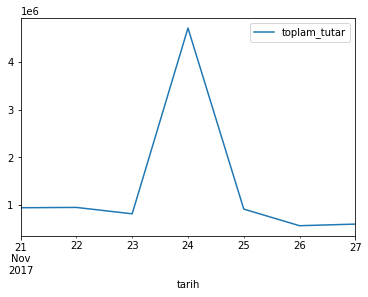

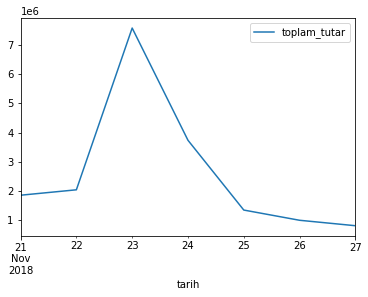

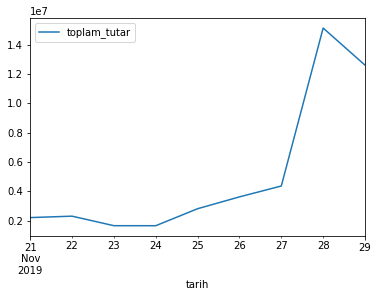

In [16]:
df2.query("tarih > '2017-11-20' and tarih < '2017-11-28'").plot(x='tarih', y='toplam_tutar')
df2.query("tarih > '2018-11-20' and tarih < '2018-11-28'").plot(x='tarih', y='toplam_tutar')
df2.query("tarih > '2019-11-20' and tarih < '2019-11-30'").plot(x='tarih', y='toplam_tutar')
#black friday artışları- bazen 1 gün önce bazen 3 gün sonra olmuş 

#### 21 Aralık (En uzun gece)

<AxesSubplot:xlabel='tarih'>

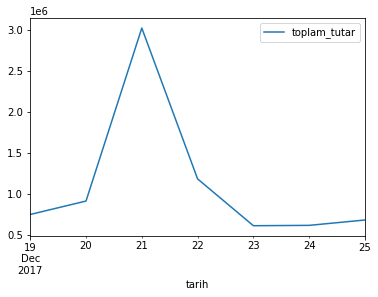

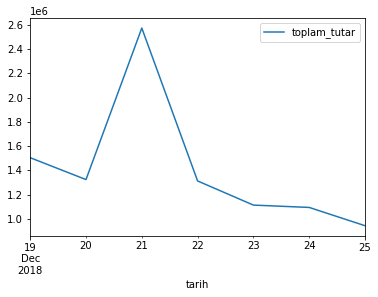

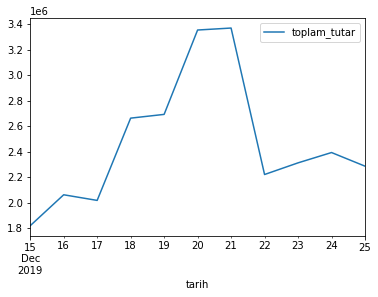

In [17]:
df2.query("tarih > '2017-12-18' and tarih < '2017-12-26'").plot(x='tarih', y='toplam_tutar')
df2.query("tarih > '2018-12-18' and tarih < '2018-12-26'").plot(x='tarih', y='toplam_tutar')
df2.query("tarih > '2019-12-14' and tarih < '2019-12-26'").plot(x='tarih', y='toplam_tutar')
#21 aralıkta fiyat artışı hiç şaşmamış. her zaman bu tarihte bi artış olmuş.

#### 11 Aralık

<AxesSubplot:xlabel='tarih'>

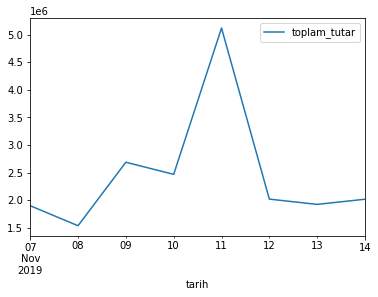

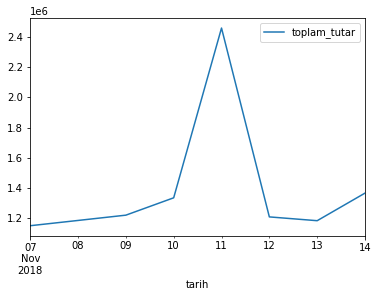

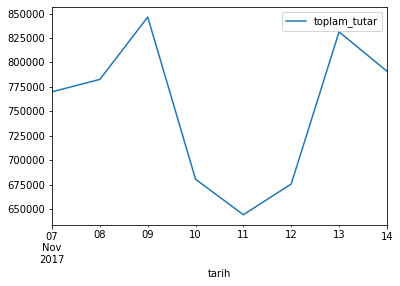

In [18]:
df2.query("tarih > '2019-11-06' and tarih < '2019-11-15'").plot(x='tarih', y='toplam_tutar')
df2.query("tarih > '2018-11-06' and tarih < '2018-11-15'").plot(x='tarih', y='toplam_tutar')
df2.query("tarih > '2017-11-06' and tarih < '2017-11-15'").plot(x='tarih', y='toplam_tutar')

#### Okulların açılmasının satışlara etkisi 

<AxesSubplot:xlabel='tarih'>

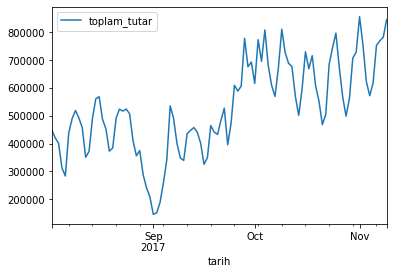

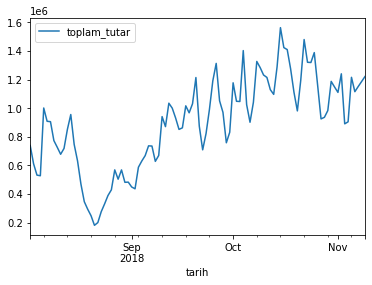

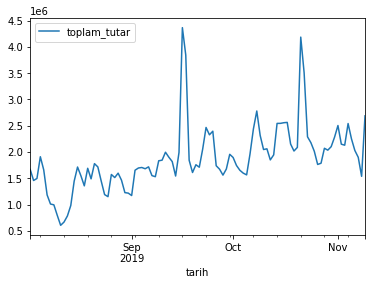

In [19]:
#okulların açıldığı vakitlerde de satışların arttığını görüyoruz okullar genelde 15-18 eylül arasında açılıyor
df2.query("tarih > '2017-08-01' and tarih < '2017-11-10'").plot(x='tarih', y='toplam_tutar')
df2.query("tarih > '2018-08-01' and tarih < '2018-11-10'").plot(x='tarih', y='toplam_tutar')
df2.query("tarih > '2019-08-01' and tarih < '2019-11-10'").plot(x='tarih', y='toplam_tutar')

#fiyatların artış eğilimine geçmesinin nedeni mevsim geçişleri de olabilir 

#### Okulların kapasnmasının satışlara etkisi 

<AxesSubplot:xlabel='tarih'>

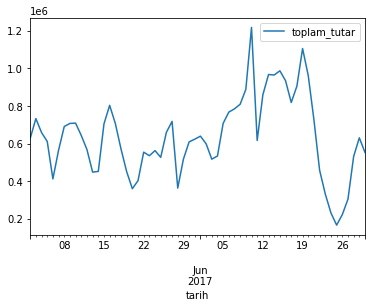

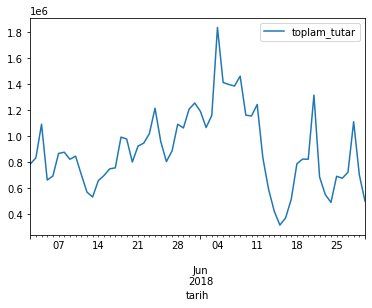

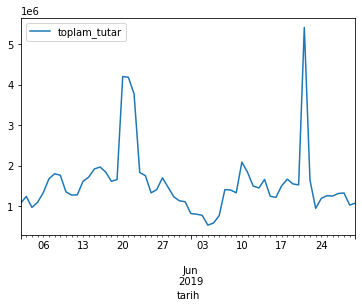

In [20]:
df2.query("tarih > '2017-05-01' and tarih < '2017-07-01'").plot(x='tarih', y='toplam_tutar')
df2.query("tarih > '2018-05-01' and tarih < '2018-07-01'").plot(x='tarih', y='toplam_tutar')
df2.query("tarih > '2019-05-01' and tarih < '2019-07-01'").plot(x='tarih', y='toplam_tutar')
#yıllık mevsimsellikten söz edilebilir,grafikler benzer.

In [21]:
#performans ölçüm metriği
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

## Görsel analiz fonksiyonları

In [22]:
def toplam_tutar_gorsel_analiz(df):
    df_group = df.groupby(['tarih']).agg({"toplam_tutar":"sum"}).reset_index()
    
    df_group["yıl"]=df_group.tarih.dt.year
    df_group["ay"]=df_group.tarih.dt.month
    df_group["gün"]=df_group.tarih.dt.day   
    
    df_group_2017=df_group[df_group["yıl"]==2017]
    df_group_2018=df_group[df_group["yıl"]==2018]
    df_group_2019=df_group[df_group["yıl"]==2019]
    

    plt.figure(figsize=(9, 6))
    plt.plot(df_group['tarih'], df_group['toplam_tutar'])
    plt.title('2017-2019 tarihler arası toplam satış tutarları')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Tutar')
    
    
  
    dategroup=df_group.groupby(['ay']).sum()
    plt.figure(figsize=(12,5))
    dategroup['toplam_tutar'].plot(x=df_group.ay)
    plt.title('Aylık toplam satış tutarı')

    dategroup=df_group.groupby(['gün']).sum()
    plt.figure(figsize=(12,5))
    dategroup['toplam_tutar'].plot(x=df_group.gün)
    plt.title('Günlük toplam satış tutarı')
    plt.show()
    
    plt.figure(figsize=(18, 12))
    plt.subplot(2, 2, 1)
    plt.plot(df_group_2017['tarih'], df_group_2017['toplam_tutar'])
    plt.title('2017 tarihli toplam satış tutarları')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Tutar')



    plt.subplot(2, 2, 2)
    plt.plot(df_group_2018['tarih'], df_group_2018['toplam_tutar'])
    plt.title('2018 tarihli toplam satış tutarları')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Tutar')



    plt.subplot(2, 2, 3)
    plt.plot(df_group_2019['tarih'], df_group_2019['toplam_tutar'])
    plt.title('2019 tarihli toplam satış tutarları')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Tutar')
    plt.show()

In [23]:
def toplam_adet_gorsel_analiz(df):
    df_group = df.groupby(['tarih']).agg({"toplam_adet":"sum"}).reset_index()
    
    df_group["yıl"]=df_group.tarih.dt.year
    df_group["ay"]=df_group.tarih.dt.month
    df_group["gün"]=df_group.tarih.dt.day   
    
    df_group_2017=df_group[df_group["yıl"]==2017]
    df_group_2018=df_group[df_group["yıl"]==2018]
    df_group_2019=df_group[df_group["yıl"]==2019]
    
    plt.figure(figsize=(9, 6))
    plt.plot(df_group['tarih'], df_group['toplam_adet'])
    plt.title('2017-2019 tarihler arası toplam adet tutarları')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Adet')
    plt.show()

    dategroup=df_group.groupby(['ay']).sum()
    plt.figure(figsize=(12,5))
    dategroup['toplam_adet'].plot(x=df_group.ay)
    plt.title('Aylık toplam adet tutarı')

    dategroup=df_group.groupby(['gün']).sum()
    plt.figure(figsize=(12,5))
    dategroup['toplam_adet'].plot(x=df_group.gün)
    plt.title('Günlük toplam adet tutarı')
    
    plt.figure(figsize=(18, 12))
    plt.subplot(2, 2, 1)
    plt.plot(df_group_2017['tarih'], df_group_2017['toplam_adet'])
    plt.title('2017 tarihli toplam adet tutarları')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Adet')



    plt.subplot(2, 2, 2)
    plt.plot(df_group_2018['tarih'], df_group_2018['toplam_adet'])
    plt.title('2018 tarihli toplam adet tutarları')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Tutar')


    plt.subplot(2, 2, 3)
    plt.plot(df_group_2019['tarih'], df_group_2019['toplam_adet'])
    plt.title('2019 tarihli toplam adet tutarları')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Adet')
    plt.show()
    

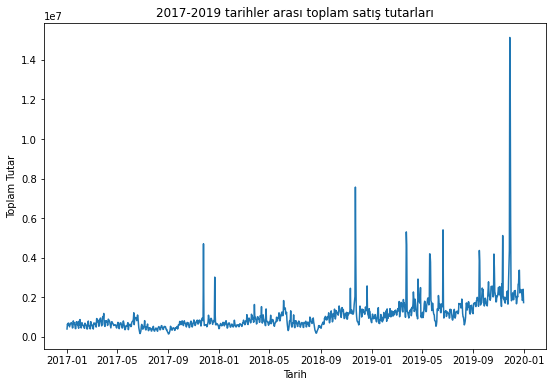

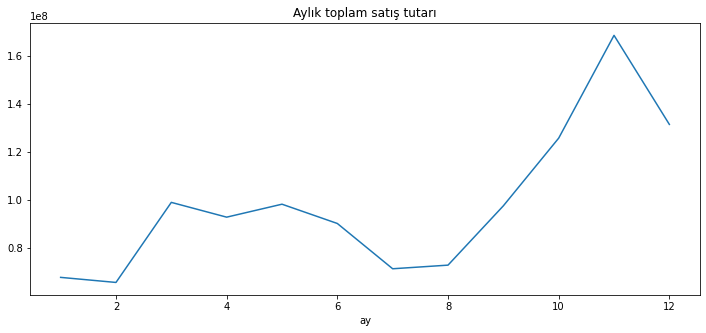

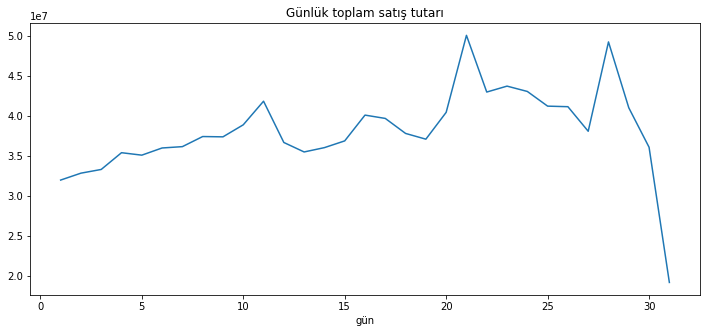

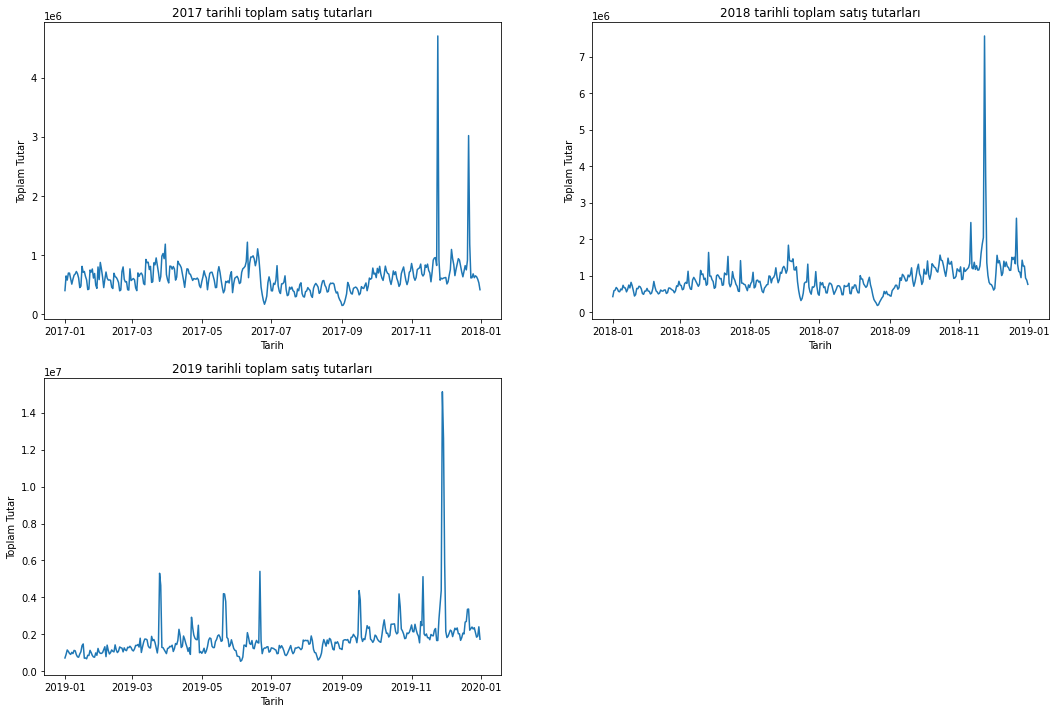

In [37]:
toplam_tutar_gorsel_analiz(df)

## Modelleme fonksiyonları

In [38]:
def toplam_tutar_model(df,date_split="",previous_day=0,future_day=0,future=False):
    df_group = df.groupby(['tarih']).agg({"toplam_tutar":"sum"}).reset_index()
    #verinin uygun hale getirilmesi
    df_group = df_group.loc[:, ["tarih","toplam_tutar"]]
    df_group['tarih'] = pd.DatetimeIndex(df_group['tarih'])
    df_group = df_group.rename(columns={'tarih': 'ds',
                            'toplam_tutar': 'y'})
    
    
    #model kurulması
    my_model = Prophet(changepoint_prior_scale= 0.1, 
                     holidays_prior_scale= 1,
                     n_changepoints= 200,
                     seasonality_mode= 'multiplicative',
                     weekly_seasonality=True,
                     interval_width=0.95)
    #gömülü tatilleri ekleme
    my_model.add_country_holidays(country_name='TR')
    
    if future==False:
        #train-test ayrımı
        train=df_group[df_group.ds<np.datetime64(date_split)]
        test=df_group[df_group.ds>=np.datetime64(date_split)]
        test_=pd.DataFrame(test["ds"])
        #model eğitimi
        my_model.fit(train)
        #tahminleme
        preds= my_model.predict(test_)
        #performans ölçümü
        print("mape:",mape(test["y"],preds["yhat"]))
        #model tahmin görselleştirmesi
        plt.figure(figsize=(16, 6))
        plt.subplot(1,2,1)
        
        plt.plot(test['ds'], test['y'])
        plt.title('Tarihe göre toplam satış tutarları')
        plt.xlabel('Tarih')
        plt.ylabel('Toplam Tutar')


        plt.subplot(1,2,2)
        plt.plot(preds['ds'], preds['yhat'],label="Tahmini ana değer")
        plt.plot(preds['ds'], preds['yhat_upper'],label="Tahmini üst bant")
        plt.plot(preds['ds'], preds['yhat_lower'],label="Tahmini alt bant")

        plt.title('Tarihe göre tahmini toplam satış tutarları ')
        plt.xlabel('Tarih')
        plt.ylabel('Toplam Tutar')
        plt.legend()
        plt.show()


        #model performans görselleştirmesi
        fig = my_model.plot_components(preds)
        plt.show()


        forecast=preds[["ds","yhat"]]

        base_start_day=np.datetime64(date_split) - np.timedelta64(previous_day,'D')
        base_last_day=np.datetime64(date_split) + np.timedelta64(len(preds),'D')

        mask = (df_group['ds'] >= base_start_day) & (df_group['ds'] <= base_last_day)
        forecastnew = df_group.loc[mask]

        fig, ax1 = plt.subplots(figsize=(16, 8))
        ax1.plot(forecastnew.set_index('ds'), color='b')
        ax1.plot(forecast.set_index('ds'), color='r')
        ax1.set_ylabel('Toplam Tutar')
        ax1.set_xlabel('Tarih')
        ax1.set_title("Kırmızı = Tahmini değerler, Mavi = Asıl değerler") 
        plt.show()
    
    else:
        my_model.fit(df_group)
        future_dates = my_model.make_future_dataframe(periods=future_day,freq="D",include_history=False)
        preds =my_model.predict(future_dates)
        #tahminleme
        
        plt.figure(figsize=(16, 6))
        plt.plot(preds['ds'], preds['yhat'],label="Tahmini ana değer")
        plt.plot(preds['ds'], preds['yhat_upper'],label="Tahmini üst bant")
        plt.plot(preds['ds'], preds['yhat_lower'],label="Tahmini alt bant")

        plt.title('Tarihe göre tahmini satış tutarları')
        plt.xlabel('Tarih')
        plt.ylabel('Toplam tutar')
        plt.legend()
        plt.show()

        
        fig = my_model.plot_components(preds)
        
        plt.show()

In [39]:
def toplam_adet_model(df,date_split,previous_day=0,future_day=0,future=False):
    
    df_group = df.groupby(['tarih']).agg({"toplam_adet":"sum"}).reset_index()
    #verinin uygun hale getirilmesi
    df_group = df_group.loc[:, ["tarih","toplam_adet"]]
    df_group['tarih'] = pd.DatetimeIndex(df_group['tarih'])
    df_group = df_group.rename(columns={'tarih': 'ds',
                            'toplam_adet': 'y'})
    
    #model kurulması
    my_model = Prophet(changepoint_prior_scale= 0.1,
                     holidays_prior_scale= 1,
                     n_changepoints= 200,
                     seasonality_mode= 'multiplicative',
                     weekly_seasonality=True,
                     interval_width=0.95)
    #gömülü tatilleri ekleme
    my_model.add_country_holidays(country_name='TR')
    if future==False:
        
        #train-test ayrımı
        train=df_group[df_group.ds<np.datetime64(date_split)]
        test=df_group[df_group.ds>=np.datetime64(date_split)]
        test_=pd.DataFrame(test["ds"])
        #model eğitimi
        my_model.fit(train)
        #tahminleme
        preds= my_model.predict(test_)
        #performans ölçümü
        print("mape:",mape(test["y"],preds["yhat"]))
        #model tahmin görselleştirmesi
        plt.figure(figsize=(16, 6))
        plt.subplot(1,2,1)
        plt.plot(test['ds'], test['y'])
        plt.title('Tarihe göre toplam adet miktarları')
        plt.xlabel('Tarih')
        plt.ylabel('Toplam Adet')


        plt.subplot(1,2,2)
        plt.plot(preds['ds'], preds['yhat'],label="Tahmini ana değer")
        plt.plot(preds['ds'], preds['yhat_upper'],label="Tahmini üst bant")
        plt.plot(preds['ds'], preds['yhat_lower'],label="Tahmini alt bant")
        plt.title('Tarihe göre tahmini toplam adet miktarları')
        plt.xlabel('Tarih')
        plt.ylabel('Toplam Adet')
        plt.legend()
        plt.show()

    
        #model performans görselleştirmesi
        fig = my_model.plot_components(preds)
        plt.show()


        forecast=preds[["ds","yhat"]]

        base_start_day=np.datetime64(date_split) - np.timedelta64(previous_day,'D')
        base_last_day=np.datetime64(date_split) + np.timedelta64(len(preds),'D')

        mask = (df_group['ds'] >= base_start_day) & (df_group['ds'] <= base_last_day)
        forecastnew = df_group.loc[mask]

        fig, ax1 = plt.subplots(figsize=(16, 8))
        ax1.plot(forecastnew.set_index('ds'), color='b')
        ax1.plot(forecast.set_index('ds'), color='r')
        ax1.set_ylabel('Adet miktarları')
        ax1.set_xlabel('Tarih')
        ax1.set_title("Kırmızı = Tahmini değerler, Mavi = Asıl değerler") 
        plt.show()
    else:
        my_model.fit(df_group)
        future_dates = my_model.make_future_dataframe(periods=future_day,freq="D",include_history=False)
        preds =my_model.predict(future_dates)
        #tahminleme
        
        plt.figure(figsize=(16, 6))
        plt.plot(preds['ds'], preds['yhat'],label="Tahmini ana değer")
        plt.plot(preds['ds'], preds['yhat_upper'],label="Tahmini üst bant")
        plt.plot(preds['ds'], preds['yhat_lower'],label="Tahmini alt bant")

        plt.title('Tarihe göre tahmini toplam adet miktarları')
        plt.xlabel('Tarih')
        plt.ylabel('Toplam Adet')
        plt.legend()
        plt.show()

        
        fig = my_model.plot_components(preds)
        plt.show()
    

14:34:20 - cmdstanpy - INFO - Chain [1] start processing
14:34:23 - cmdstanpy - INFO - Chain [1] done processing


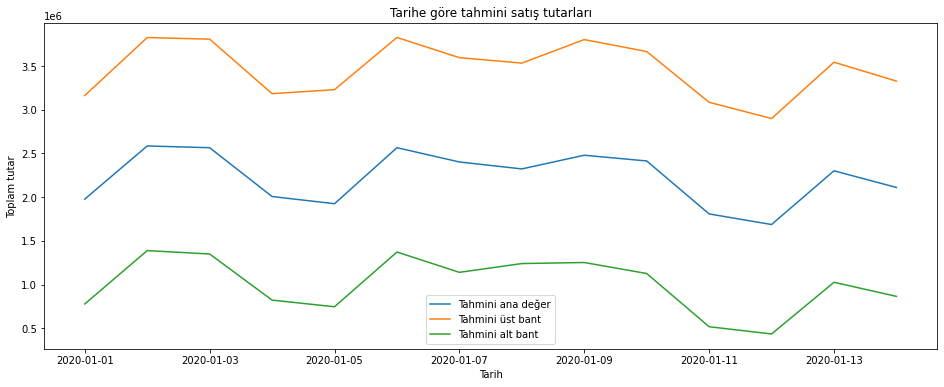

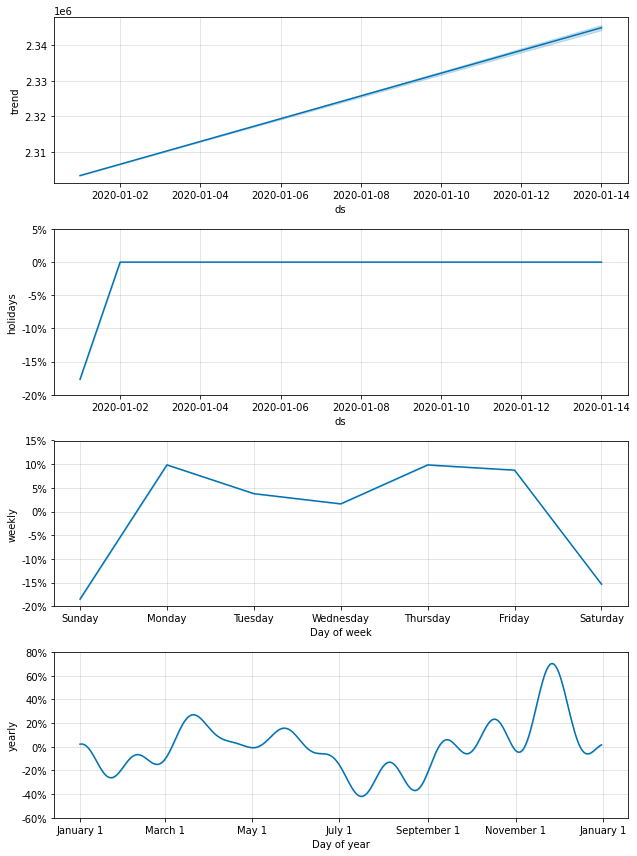

In [41]:
toplam_tutar_model(df,future=True,future_day=14)

# ÜRÜN KLASMAN REF BAZINDA

## Görsel analiz fonksiyonları

In [42]:
def klasman_tutar_gorsel_analiz(df,klasman_ref):
    df_klasman=df[df["klasman_ref"]==klasman_ref]
    df_klasman=df_klasman.groupby("tarih").agg({"toplam_tutar":"sum"}).reset_index()
    
    df_klasman["yıl"]=df_klasman.tarih.dt.year
    df_klasman["ay"]=df_klasman.tarih.dt.month
    df_klasman["gün"]=df_klasman.tarih.dt.day   
    
    df_klasman_2017=df_klasman[df_klasman["yıl"]==2017]
    df_klasman_2018=df_klasman[df_klasman["yıl"]==2018]
    df_klasman_2019=df_klasman[df_klasman["yıl"]==2019]

    #günlük-aylık-yıllık görselleştirme
    plt.figure(figsize=(9, 6))
    plt.plot(df_klasman['tarih'], df_klasman['toplam_tutar'])
    plt.title('Seçilen ürün klasman bazında tarihe göre toplam satış tutarları')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Tutar')
    dategroup=df_klasman.groupby(['ay']).sum()
    plt.figure(figsize=(12,5))
    dategroup['toplam_tutar'].plot(x=df_klasman.ay)
    plt.title('Seçilen ürün klasman bazında aylık toplam satış tutarı')
    dategroup=df_klasman.groupby(['gün']).sum()
    plt.figure(figsize=(12,5))
    dategroup['toplam_tutar'].plot(x=df_klasman.gün)
    plt.title('Seçilen ürün klasman bazında günlük toplam satış tutarı')
    
    plt.figure(figsize=(18, 12))
    plt.subplot(2, 2, 1)
    plt.plot(df_klasman_2017['tarih'], df_klasman_2017['toplam_tutar'])
    plt.title('Seçilen ürün klasman bazında 2017 tarihli toplam satış tutarları')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Tutar')


    plt.subplot(2, 2, 2)
    plt.plot(df_klasman_2018['tarih'], df_klasman_2018['toplam_tutar'])
    plt.title('Seçilen ürün klasman bazında  2018 tarihli toplam satış tutarları')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Tutar')



    plt.subplot(2, 2, 3)
    plt.plot(df_klasman_2019['tarih'], df_klasman_2019['toplam_tutar'])
    plt.title('Seçilen ürün klasman bazında 2019 tarihli toplam satış tutarları')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Tutar')
    plt.show()
    
    

In [43]:
def klasman_adet_gorsel_analiz(df,klasman_ref):
    df_klasman=df[df["klasman_ref"]==klasman_ref]
    df_klasman=df_klasman.groupby("tarih").agg({"toplam_adet":"sum"}).reset_index()

    df_klasman["yıl"]=df_klasman.tarih.dt.year
    df_klasman["ay"]=df_klasman.tarih.dt.month
    df_klasman["gün"]=df_klasman.tarih.dt.day   

    df_klasman_2017=df_klasman[df_klasman["yıl"]==2017]
    df_klasman_2018=df_klasman[df_klasman["yıl"]==2018]
    df_klasman_2019=df_klasman[df_klasman["yıl"]==2019]
    

    plt.figure(figsize=(9, 6))
    plt.plot(df_klasman['tarih'], df_klasman['toplam_adet'])
    plt.title('Seçilen ürün klasman bazında tarihe göre toplam adet tutarları')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Adet')

    dategroup=df_klasman.groupby(['ay']).sum()
    plt.figure(figsize=(12,5))
    dategroup['toplam_adet'].plot(x=df_klasman.ay)
    plt.title('Seçilen ürün klasman bazında aylık toplam adet tutarı')

    dategroup=df_klasman.groupby(['gün']).sum()
    plt.figure(figsize=(12,5))
    dategroup['toplam_adet'].plot(x=df_klasman.gün)
    plt.title('Seçilen ürün klasman bazında günlük toplam adet tutarı')
    plt.show()


    plt.figure(figsize=(18, 12))
    plt.subplot(2, 2, 1)
    plt.plot(df_klasman_2017['tarih'], df_klasman_2017['toplam_adet'])
    plt.title('Seçilen ürün klasman bazında 2017 tarihli toplam adet tutarları')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Tutar')



    plt.subplot(2, 2, 2)
    plt.plot(df_klasman_2018['tarih'], df_klasman_2018['toplam_adet'])
    plt.title('Seçilen ürün klasman bazında 2018 tarihli toplam adet tutarları')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Tutar')



    plt.subplot(2, 2, 3)
    plt.plot(df_klasman_2019['tarih'], df_klasman_2019['toplam_adet'])
    plt.title('Seçilen ürün klasman bazında 2019 tarihli toplam adet tutarları')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Tutar')
    plt.show()


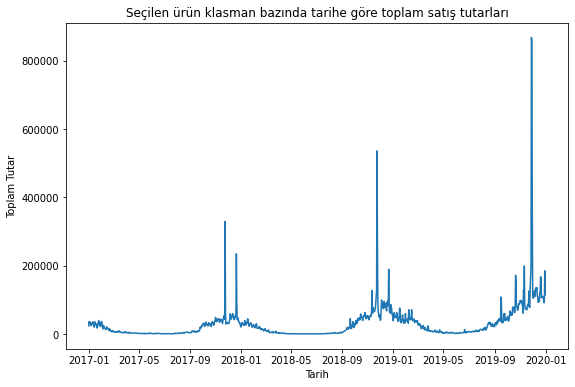

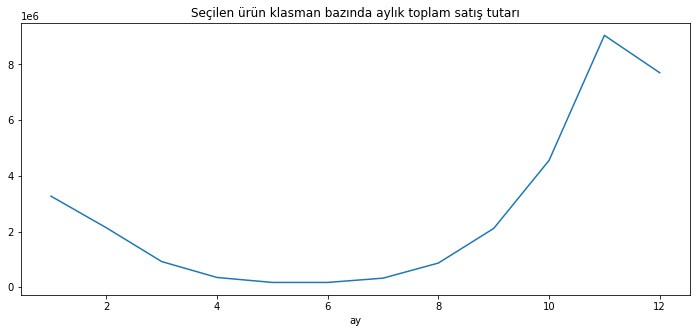

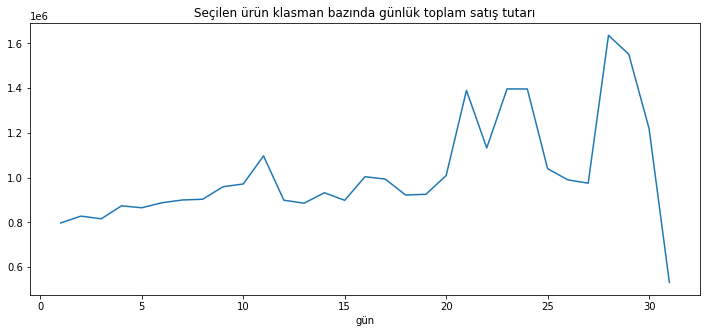

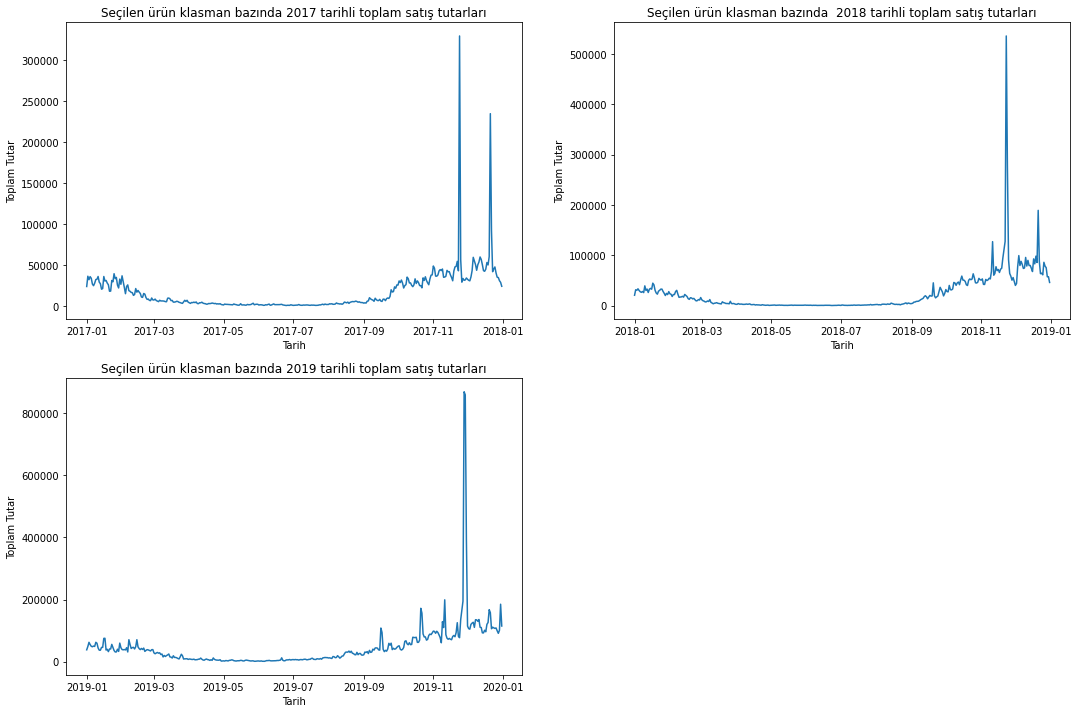

In [44]:
klasman_tutar_gorsel_analiz(df,klasman_ref=3081)

## Modelleme Fonksiyonları

In [45]:
def klasman_tutar_model(df,klasman_ref,date_split="",previous_day=0,future_day=0,future=False):
    df_group=df[df["klasman_ref"]==klasman_ref]
    df_group = df_group.groupby(['tarih']).agg({"toplam_tutar":"sum"}).reset_index()
    #verinin uygun hale getirilmesi
    df_group = df_group.loc[:, ["tarih","toplam_tutar"]]
    df_group['tarih'] = pd.DatetimeIndex(df_group['tarih'])
    df_group = df_group.rename(columns={'tarih': 'ds',
                            'toplam_tutar': 'y'})
    
    
    #model kurulması
    my_model = Prophet(changepoint_prior_scale= 0.1,
                     holidays_prior_scale= 1,
                     n_changepoints= 200,
                     seasonality_mode= 'multiplicative',
                     weekly_seasonality=True,
                     interval_width=0.95)
    #gömülü tatilleri ekleme
    my_model.add_country_holidays(country_name='TR')
    
    if future==False:
        #train-test ayrımı
        train=df_group[df_group.ds<np.datetime64(date_split)]
        test=df_group[df_group.ds>=np.datetime64(date_split)]
        test_=pd.DataFrame(test["ds"])
        #model eğitimi
        my_model.fit(train)
        #tahminleme
        preds= my_model.predict(test_)
        #performans ölçümü
        print("mape:",mape(test["y"],preds["yhat"]))
        #model tahmin görselleştirmesi
        plt.figure(figsize=(16, 6))
        plt.subplot(1,2,1)
        
        plt.plot(test['ds'], test['y'])
        plt.title('Tarihe göre toplam satış değerleri')
        plt.xlabel('Tarih')
        plt.ylabel('Toplam Tutar')


        plt.subplot(1,2,2)
        plt.plot(preds['ds'], preds['yhat'],label="Tahmini ana değer")
        plt.plot(preds['ds'], preds['yhat_upper'],label="Tahmini üst bant")
        plt.plot(preds['ds'], preds['yhat_lower'],label="Tahmini alt bant")

        plt.title('Tarihe göre tahmini toplam satış değerleri')
        plt.xlabel('Tarih')
        plt.ylabel('Toplam Tutar')
        plt.legend()
        plt.show()


        #model performans görselleştirmesi
        fig = my_model.plot_components(preds)
        plt.show()


        forecast=preds[["ds","yhat"]]

        base_start_day=np.datetime64(date_split) - np.timedelta64(previous_day,'D')
        base_last_day=np.datetime64(date_split) + np.timedelta64(len(preds),'D')

        mask = (df_group['ds'] >= base_start_day) & (df_group['ds'] <= base_last_day)
        forecastnew = df_group.loc[mask]

        fig, ax1 = plt.subplots(figsize=(16, 8))
        ax1.plot(forecastnew.set_index('ds'), color='b')
        ax1.plot(forecast.set_index('ds'), color='r')
        ax1.set_ylabel('Toplam tutar')
        ax1.set_xlabel('Tarih')
        ax1.set_title("Kırmızı = Tahmini değerler, Mavi = Asıl değerler") 
        plt.show()
    
    else:
        my_model.fit(df_group)
        future_dates = my_model.make_future_dataframe(periods=future_day,freq="D",include_history=False)
        preds =my_model.predict(future_dates)
        #tahminleme
        
        plt.figure(figsize=(16, 6))
        plt.plot(preds['ds'], preds['yhat'],label="Tahmini ana değer")
        plt.plot(preds['ds'], preds['yhat_upper'],label="Tahmini üst bant")
        plt.plot(preds['ds'], preds['yhat_lower'],label="Tahmini alt bant")

        plt.title('Tarihe göre tahmini satış tutarları')
        plt.xlabel('Tarih')
        plt.ylabel('Toplam tutar')
        plt.legend()
        plt.show()

        
        fig = my_model.plot_components(preds)
        plt.show()

In [46]:
def klasman_adet_model(df,klasman_ref,date_split="",previous_day=0,future_day=0,future=False):
    df_group=df[df["klasman_ref"]==klasman_ref]
    df_group = df_group.groupby(['tarih']).agg({"toplam_adet":"sum"}).reset_index()
    #verinin uygun hale getirilmesi
    df_group = df_group.loc[:, ["tarih","toplam_adet"]]
    df_group['tarih'] = pd.DatetimeIndex(df_group['tarih'])
    df_group = df_group.rename(columns={'tarih': 'ds',
                            'toplam_adet': 'y'})
    
    
    #model kurulması
    my_model = Prophet(changepoint_prior_scale= 0.1,
                     holidays_prior_scale= 1,
                     n_changepoints= 200,
                     seasonality_mode= 'multiplicative',
                     weekly_seasonality=True,
                     interval_width=0.95)
    #gömülü tatilleri ekleme
    my_model.add_country_holidays(country_name='TR')
    
    if future==False:
        #train-test ayrımı
        train=df_group[df_group.ds<np.datetime64(date_split)]
        test=df_group[df_group.ds>=np.datetime64(date_split)]
        test_=pd.DataFrame(test["ds"])
        #model eğitimi
        my_model.fit(train)
        #tahminleme
        preds= my_model.predict(test_)
        #performans ölçümü
        print("mape:",mape(test["y"],preds["yhat"]))
        #model tahmin görselleştirmesi
        plt.figure(figsize=(16, 6))
        plt.subplot(1,2,1)
        
        plt.plot(test['ds'], test['y'])
        plt.title('Tarihe göre toplam adet miktarları')
        plt.xlabel('Tarih')
        plt.ylabel('Toplam adet')


        plt.subplot(1,2,2)
        plt.plot(preds['ds'], preds['yhat'],label="Tahmini ana değer")
        plt.plot(preds['ds'], preds['yhat_upper'],label="Tahmini üst bant")
        plt.plot(preds['ds'], preds['yhat_lower'],label="Tahmini alt bant")

        plt.title('Tarihe göre tahmini toplam adet miktarları')
        plt.xlabel('Tarih')
        plt.ylabel('Toplam Adet')
        plt.legend()
        plt.show()


        #model performans görselleştirmesi
        fig = my_model.plot_components(preds)
        plt.show()


        forecast=preds[["ds","yhat"]]

        base_start_day=np.datetime64(date_split) - np.timedelta64(previous_day,'D')
        base_last_day=np.datetime64(date_split) + np.timedelta64(len(preds),'D')

        mask = (df_group['ds'] >= base_start_day) & (df_group['ds'] <= base_last_day)
        forecastnew = df_group.loc[mask]

        fig, ax1 = plt.subplots(figsize=(16, 8))
        ax1.plot(forecastnew.set_index('ds'), color='b')
        ax1.plot(forecast.set_index('ds'), color='r')
        ax1.set_ylabel('Toplam adet')
        ax1.set_xlabel('Tarih')
        ax1.set_title("Kırmızı = Tahmini değerler, Mavi = Asıl değerler") 
        plt.show()
    
    else:
        my_model.fit(df_group)
        future_dates = my_model.make_future_dataframe(periods=future_day,freq="D",include_history=False)
        preds =my_model.predict(future_dates)
        #tahminleme
        
        plt.figure(figsize=(16, 6))
        plt.plot(preds['ds'], preds['yhat'])
        plt.plot(preds['ds'], preds['yhat_upper'])
        plt.plot(preds['ds'], preds['yhat_lower'])

        plt.title('Tarihe göre tahmini toplam adet değerleri')
        plt.xlabel('Tarih')
        plt.ylabel('Toplam Adet')
        plt.show()

        
        fig = my_model.plot_components(preds)
        plt.show()

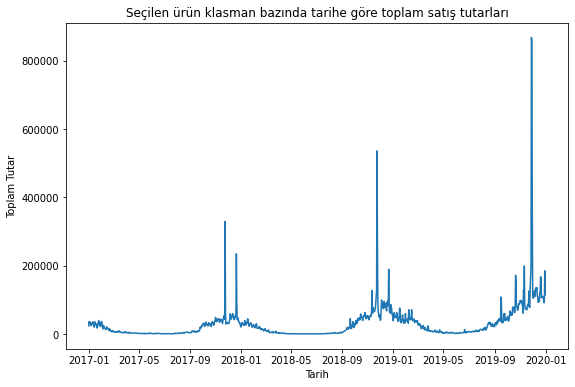

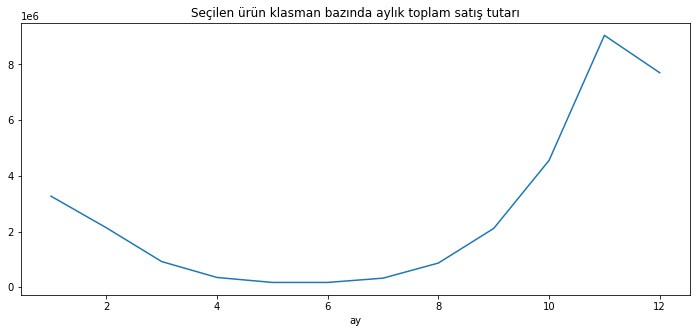

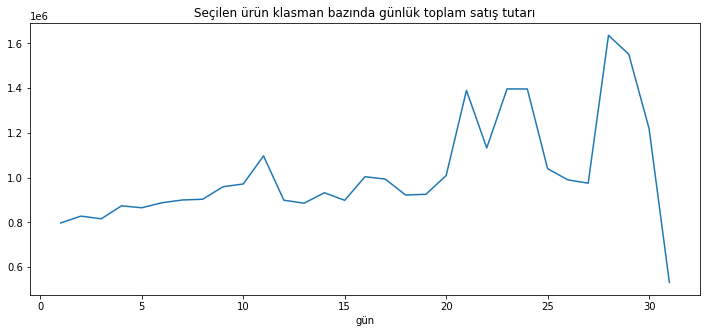

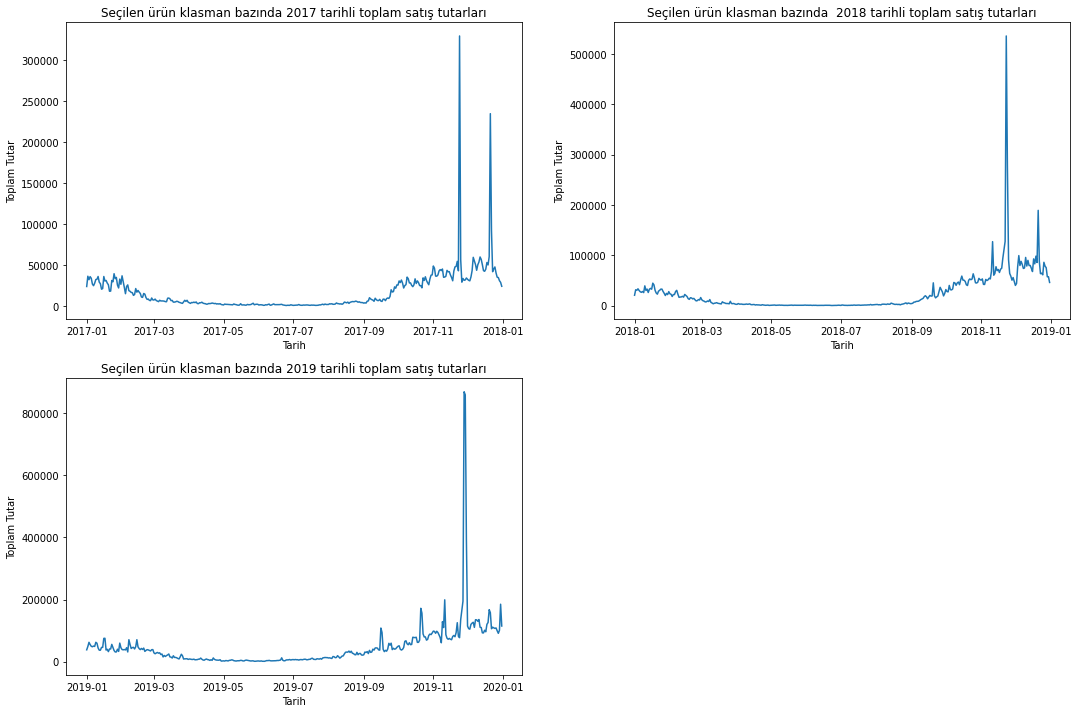

In [35]:
klasman_tutar_gorsel_analiz(df,3081)

14:36:50 - cmdstanpy - INFO - Chain [1] start processing
14:36:53 - cmdstanpy - INFO - Chain [1] done processing


mape: 34.14066710308892


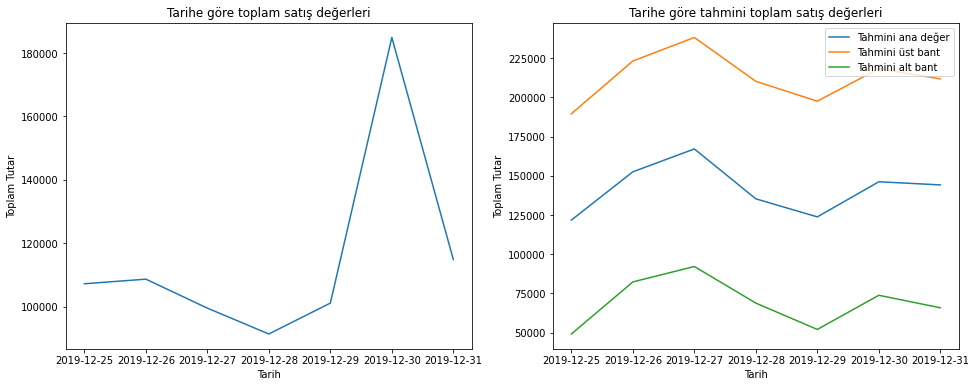

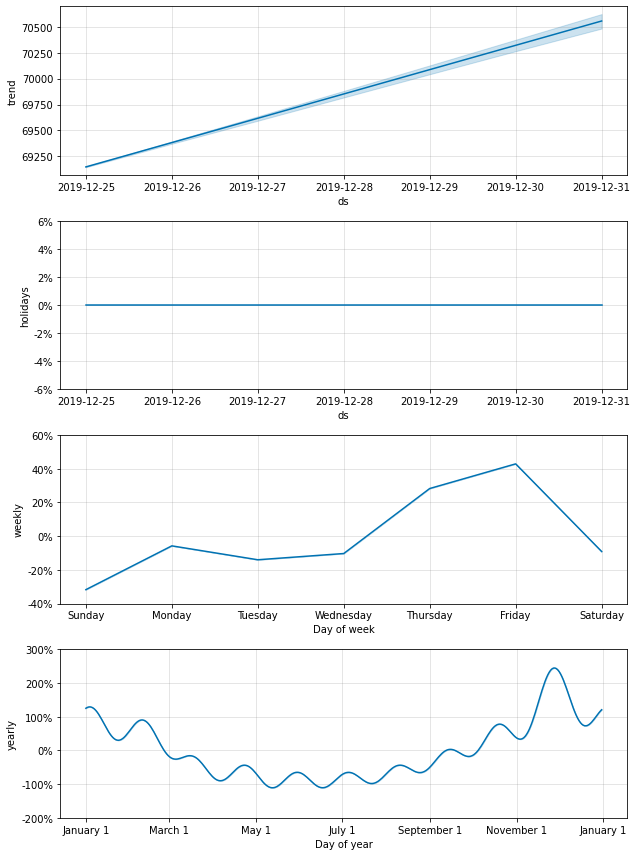

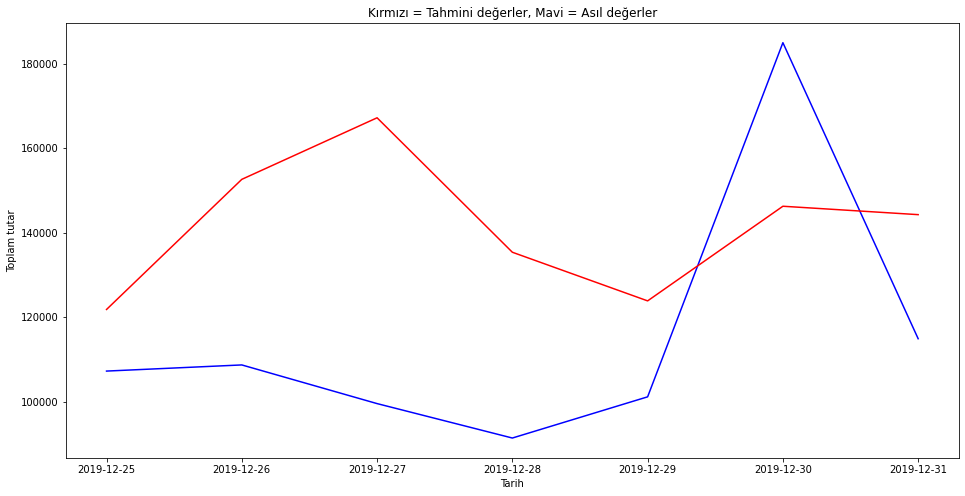

In [47]:
klasman_tutar_model(df,klasman_ref=3081,date_split="2019-12-25")

14:37:35 - cmdstanpy - INFO - Chain [1] start processing
14:37:39 - cmdstanpy - INFO - Chain [1] done processing


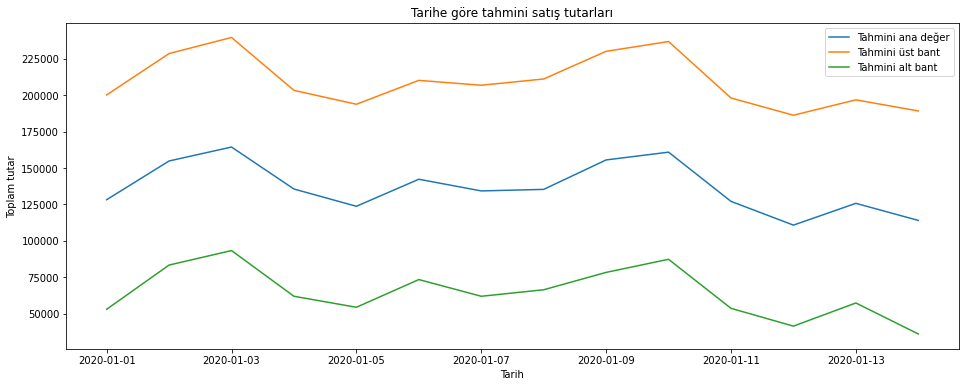

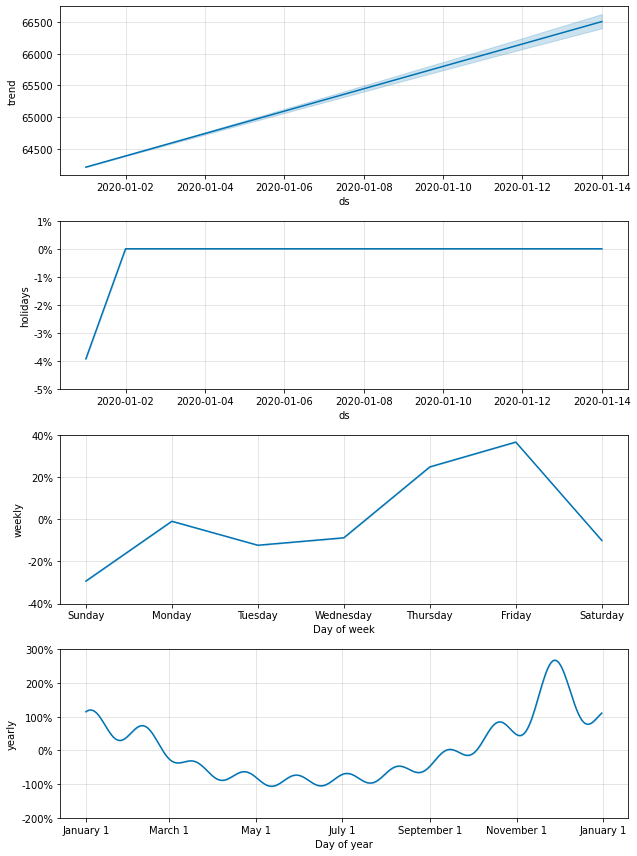

In [48]:
klasman_tutar_model(df,klasman_ref=3081,future=True,future_day=14)